- The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# What is a Term Deposit?

- A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia:

In [1]:
#Importing The Packeges:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the DataSet:-

df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


- This DataSet Already Use Feature Scaling Method.

- age:- Age in years.
- job:- Type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student']).
- marital:- Marital status (categorical: ['married' 'single' 'divorced']).
- education:-  Education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown']).
- default:- Has credit in default? (categorical: ['no' 'yes']).
- balance:- Balance of the individual.
- housing:- Has housing loan? (categorical: ['yes' 'no']).
- loan:- Has personal loan? (categorical: ['no' 'yes']).
- contact:- Contact communication type (categorical: ['unknown' 'cellular' 'telephone']).
- day:- Last contact day of the week (categorical: 'mon','tue','wed','thu','fri').
- month:- Last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']).
- duration:- Last contact duration, in seconds (numeric).
- campaign:- Number of contacts performed during this campaign and for this client.
- pdays:- Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
- previous:- Number of contacts performed before this campaign and for this client. 
- poutcome:- Outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success']).

- deposit:- Has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
#TO check the shape of the DataSet:-

df.shape

(11162, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
#Check basic statistics for each columns:-

df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [6]:
#Finding null values columns:-

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

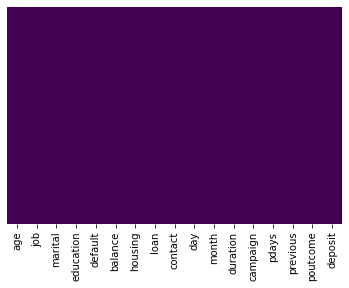

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [8]:
#Checking Duplicated Rows:-

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [9]:
df["deposit"].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

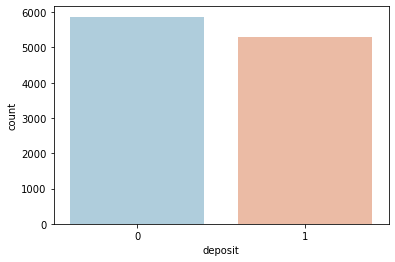

In [11]:
#EDA:-

sns.countplot(x="deposit",data=df,palette='RdBu_r')
plt.show()

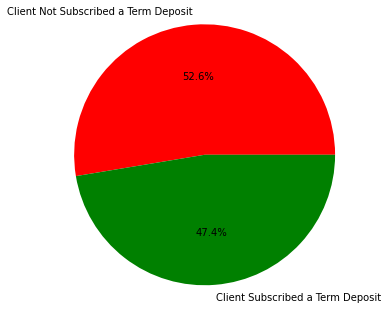

In [13]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['deposit'].value_counts(), labels=['Client Not Subscribed a Term Deposit','Client Subscribed a Term Deposit'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)
plt.show()

In [19]:
df["marital"].value_counts()

1    6351
2    3518
0    1293
Name: marital, dtype: int64

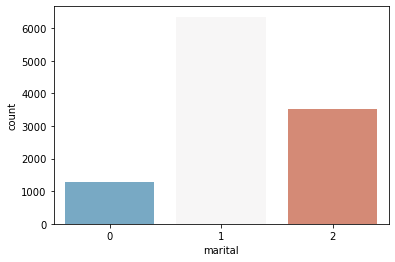

In [20]:
#EDA:-

sns.countplot(x="marital",data=df,palette='RdBu_r')
plt.show()

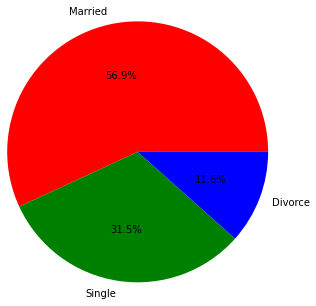

In [21]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['marital'].value_counts(), labels=["Married","Single","Divorce"], colors=["red","green","blue"], autopct='%1.1f%%', radius=1.5)
plt.show()

-  After analysing Pie Chart there are 56.9% Of Married, 31.5% Single, 11.6% Divorce Peopel's are there.

In [22]:
df["loan"].value_counts()

0    9702
1    1460
Name: loan, dtype: int64

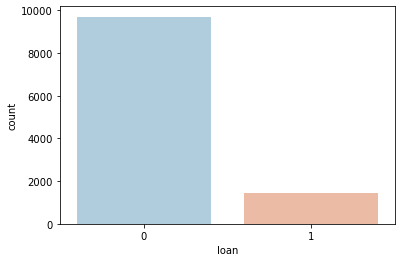

In [23]:
#EDA:-

sns.countplot(x="loan",data=df,palette='RdBu_r')
plt.show()

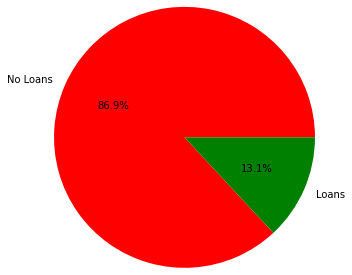

In [24]:
# For Better Visual representation with Pie Chart:-

plt.pie(df['loan'].value_counts(), labels=["No Loans","Loans"], colors=["red","green"], autopct='%1.1f%%', radius=1.5)
plt.show()

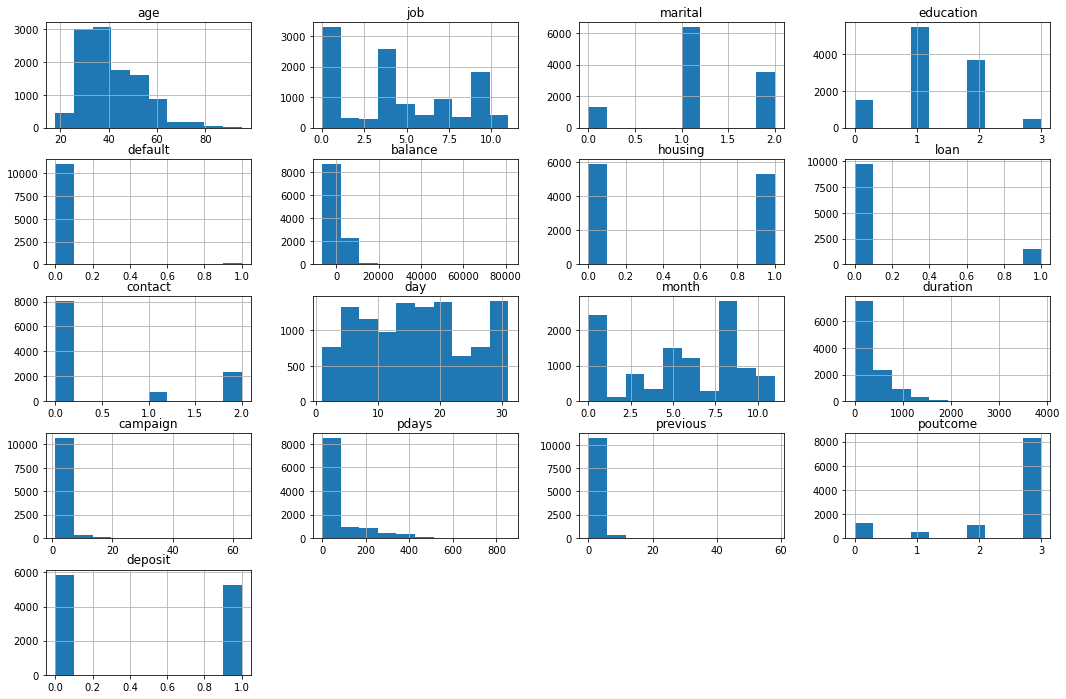

In [25]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

# Separation of X and Y.

In [26]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

- Once you have X And Y you will do train test split.

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

- Importing all the necessary models:-

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [30]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [31]:
mymodel(logreg)

Accuracy :- 0.7567180222142601
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1503
           1       0.75      0.71      0.73      1288

    accuracy                           0.76      2791
   macro avg       0.76      0.75      0.75      2791
weighted avg       0.76      0.76      0.76      2791

[[1192  311]
 [ 368  920]]


LogisticRegression()

In [33]:
mymodel(knn)

Accuracy :- 0.7355786456467216
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1503
           1       0.71      0.71      0.71      1288

    accuracy                           0.74      2791
   macro avg       0.73      0.73      0.73      2791
weighted avg       0.74      0.74      0.74      2791

[[1137  366]
 [ 372  916]]


KNeighborsClassifier()

In [34]:
mymodel(svc)

Accuracy :- 0.737370118237191
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1503
           1       0.75      0.64      0.69      1288

    accuracy                           0.74      2791
   macro avg       0.74      0.73      0.73      2791
weighted avg       0.74      0.74      0.73      2791

[[1231  272]
 [ 461  827]]


SVC()

In [35]:
mymodel(dtc)

Accuracy :- 0.7753493371551415
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1503
           1       0.76      0.75      0.75      1288

    accuracy                           0.78      2791
   macro avg       0.77      0.77      0.77      2791
weighted avg       0.78      0.78      0.78      2791

[[1199  304]
 [ 323  965]]


DecisionTreeClassifier()

In [36]:
mymodel(rfc)

Accuracy :- 0.8405589394482265
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1503
           1       0.81      0.85      0.83      1288

    accuracy                           0.84      2791
   macro avg       0.84      0.84      0.84      2791
weighted avg       0.84      0.84      0.84      2791

[[1245  258]
 [ 187 1101]]


RandomForestClassifier()

- After analysing all the default models, We wiil tell that the best model for Bank DataSet is Random Forest Classifier have best accuracy.

. BEST SCORES
-  RANDOM FOREST CLASSIFIER HAVE 84% OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE 78% OF ACCURACY.
-  LOGISTIC REGRESSION HAVE 76% OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE 74% OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE 74% OF ACCURACY.